In [1]:
import numpy  as  np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.tree  import DecisionTreeClassifier #决策树
from  sklearn.linear_model  import  LogisticRegression
import sklearn.datasets  as datasets
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #制造数据
%matplotlib inline

In [2]:
center=[[-6,0],[5,0],[10,-2]] #三个圆心

In [3]:
x,y=make_blobs(n_samples=1000, #点的数量
               centers=center, #三个中心
               cluster_std=[2.0,0.9,1.7]) #离散程度

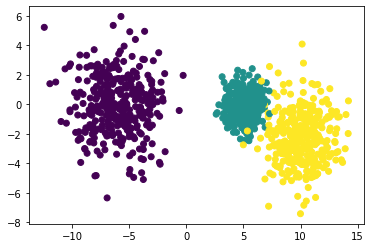

In [4]:
plt.scatter(x[:,0],x[:,1],c=y) #绘图
plt.show()

In [6]:
dtc=DecisionTreeClassifier (max_depth=100) #决策树.深度越深，精确度越高
dtc.fit(x,y) #训练数据

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
h=0.02  #步长
x_min,x_max=x[:,0].min()-1, x[:,0].max()+1 #上限，下限
y_min,y_max=x[:,1].min()-1,x[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h)) #生成网格
z=dtc.predict(np.c_[xx.ravel(),yy.ravel()])  #得到预测
z=z.reshape(xx.shape) #结果降维
z




array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

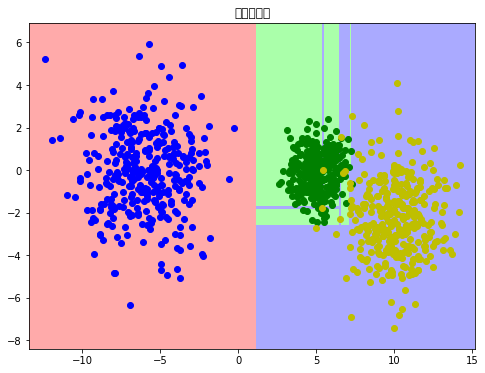

In [8]:
from  matplotlib.colors  import  ListedColormap
plt.figure(figsize=(8,6)) #描述大小
cmaps = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF']) #绘图颜色
plt.contourf(xx,yy,z,cmap=cmaps) #分类的颜色
plt.title("决策树回归")
plt.axis("tight")
colors="bgy"
#遍历3个类，根据颜色，标识
for i, color  in zip(dtc.classes_,colors): 
    idx=np.where(y==i)
    plt.scatter(x[idx,0],x[idx,1],c=color,cmap=plt.cm.Paired)
plt.show()